# Coursera / IBM Data Science Professional Certificate - Capstone Project
## Week 5
### This project is utilized for the Coursera IBM Data Science Capstone Project. The project will focus on a (chosen) use-case to solve a problem using neighbourhood and location data at the city of Toronto, Canada.

##### Report Link: 
##### https://github.com/zer0-zer0-edward/Coursera_Capstone/blob/main/202104530_Capstone_Project_Week-5_Report.pdf

##### Presentation Link: 
##### https://github.com/zer0-zer0-edward/Coursera_Capstone/blob/main/202104530_Capstone_Project_Week-5_Presentation.pdf

## Table of Contents
* [Introduction: Business Problem](#Introduction)
* [Data](#Data) 
* [Methodology](#Methodology)
* [Analysis](#Analysis)
* [Results and Discussion](#Results)
* [Conclusion](#Conclusion)

## Introduction: Business Problem <a name="Introduction"></a>

### Use-Case Scenario
#### The use-case scenario is to help a single family find the most favorable neighbourhoods to start a Thai restaurant, as well as, to find an affordable home location nearby the possible restaurant location in the Toronto area.

### Audience
#### The target audience (or stakeholders) are mainly for individuals (in this case single-type families [1-4 members]) who want to start a food restaurant and move in the Toronto area. The use-case and dataset are also viable for individuals who want to start an ethnic-based food restaurant (in this use-case Thai [or Asian/Pacific Islander] cuisine).

#### The assessment and datasets provided can help determine the best possible neighbourhood locations and provide the stakeholder/s a set of choices based on their requirements. The assessment can also provide information what the state of restaurant businesses in a neighbourhood (e.g. provide what type of restaurants are in the neighborhood). 

## Data <a name="Data"></a>

#### The data collected for this project was provided by the City of Toronto's Open Data Platform. Resources to the data will be provided in the final notebook/presentation/report. Collected data are as follows:

| Demographics | Economics | Environment | Health | Housing | Crime Rates | Safety | Total Population |
| ------------ | --------- | ----------- | ------ | ------- | ----------- | ------ | ---------------- |

#### Respectively, each dataset were collected on 2011 through 2020 - the majority of the data collected being on 2011. These datasets are processed (or quantified) by neighbourhood. The Demographics dataset include population, age range, and language used. The Economics dataset include home prices and total  businesses. The Environment dataset include pollutant scores and tree cover (trees available/saturation). The Health dataset include DineSafe inspections, health providers, and student nutrition scores. The Housing dataset also include home pricing. Both Crime Rates and Safety datasets are divided by some of the most common infractions - assault, auto theft, breaking and entering, robbery, theft, and homicide. The Total Population dataset include total population by year and population change rate.

#### The majority of the work done on Week 4, concentrated on data research, data cleaning, and data pre-processing. Data processing were evaluated on this notebook and Microsoft Excel. The datasets provided will be utilized to assess the quality of life in each neighbourhood. The Foursquare dataset will be utilized to determine where restaurants are located and what type of restaurants may be competitive in that neighbourhood.

#### Week 5 continues data assessment and provide results for the use-case and stakeholder/s. The main focus of the work will be on neighbourhood analysis continued from Week 4's quality of life selection and further analyze safety/health factors that provides the optimal result/s. 

#### Please note that the neighbourhood dataset may be different from Week 3. The datasets obtained from the City of Toronto reflects 140 neighbourhoods in the Toronto area. Neighbourhood names have been updated as well as each of these neighbourhoods have been assigned a "Neighbourhood Id". Some of the neighbourhoods may also be combined (or separated) with other neighbourhoods. In 2021, more neighbourhoods have been classified in Toronto - 158. The 158 neighbourhood dataset is not used in this assessment.

### Neighbourhood Candidates
#### The candidates are chosen from records provided by the City of Toronto's Open Data Platform. All 140 neighbourhoods will be assessed based on selected and satisfactory factors. Ultimately, one neighbourhood will be chosen for further assessment using the Foursquare API to determine food venues, mainly Asian food restaurants.

### Data Resources
#### City of Toronto's Open Data Platform: https://open.toronto.ca/
#### Toronto Police: https://data.torontopolice.on.ca/
#### Neighbourhood Crime Rates 2011: https://open.toronto.ca/dataset/neighbourhood-crime-rates/
#### Neighbourhood Crime Rates 2020: https://data.torontopolice.on.ca/datasets/neighbourhood-crime-rates-2020-1
#### Toronto Environment: https://open.toronto.ca/dataset/wellbeing-toronto-environment/
#### Toronto Health: https://open.toronto.ca/dataset/wellbeing-toronto-health/
#### Toronto Safety: https://open.toronto.ca/dataset/wellbeing-toronto-safety/
#### Toronto Housing: https://open.toronto.ca/dataset/wellbeing-toronto-housing/
#### Toronto Economics: https://open.toronto.ca/dataset/wellbeing-toronto-economics/
#### Toronto Demographics: https://open.toronto.ca/dataset/wellbeing-toronto-demographics/
#### Canada Inflation Rate: https://tradingeconomics.com/canada/inflation-cpi

#### NOTE: The assessment and analysis done below will not rely on all information provided. Selection of each dataset and subsequent subsets will rely on the needs of each stakeholder.

## Methodology <a name="Methodology"></a>

#### The best neighbourhood will mainly be selected based on safety and health factors. These factors include neighbourhood crime rates, fire rates, hazardous incidents, pollutants released in air, carcinogenic TEP score, and health providers. Each factor is provided by the City of Toronto and have been recorded in a 2011 census. Currently, no new datasets were available during assessment except for 2016 population rates and a 2020 crime rate for each neigbourhood. These newer datasets will be utilized as updates in main 2011 datasets.

#### The first step will heavily rely on collecting data from Toronto's Open Data Platform. Each dataset will be cleaned and processed using Python and Excel. Once, appropriate pre-data exploration will be done to assess the quality of the data.

#### The second step will comprise with further data exploration and analysis. This step will assess which datasets will be used and divided into subsets for further investigation to verify safety, health, and extra factors that will be helpful for the client to understand the provided data. This step will also include clustering all Toronto 140 neighbourhoods and will be further broken down in preparation for the next step.

#### The third step will mainly focus on selecting the best neighbourhood in the Toronto area. Selection includes central Toronto neighbourhoods, meaning that the selection process will only select neighbourhoods on the safety and health factors - and to include neighbourhoods in "Toronto" (Toronto-named boroughs).

#### The fourth step will utilize the Foursquare API to determine available restaurants that may be competitive in that neighbourhood area. In these use-case scenario, competition will be based on available Thai restaurant/s (or possibly similar ethnic cuisine). Listing other restaurants in the area may still be useful data to the stakeholder to assess other plans in the neighbourhood area.

## Analysis <a name="Analysis"></a>

#### Analysis-1 -- Process available data

#### Import libraries

In [1]:
# Import libraries
import numpy as np
from functools import reduce

import pandas as pd
from pandas.io.json import json_normalize # Transforming json file into a pandas dataframe library

import requests

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

# !pip install bs4
# from bs4 import BeautifulSoup

# !conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # Convert an address into latitude and longitude values

import seaborn as sns

# !conda install -c conda-forge folium=0.5.0 --yes
import folium # Map rendering library

print('Libraries imported.')

Libraries imported.


#### Function call/s

In [2]:
# Function - Select boroughs that have "Toronto" only
def tor_only(sub_data):
    return sub_data[sub_data['Borough'].str.contains('Toronto', na=False)]

#### Upload / Read csv files

In [3]:
# Upload csv files
neigh_up_df = pd.read_csv('toronto_neighbourhood_update.csv') # left DataFrame
geo_data_df = pd.read_csv('Geospatial_Coordinates.csv')# right DataFrame

# New data - from City of Toronto
tor_demo_df = pd.read_csv('toronto_demographics_2011.csv') # 2011 data
tor_econ_df = pd.read_csv('toronto_economics_2011.csv') # 2011 data
tor_envi_df = pd.read_csv('toronto_environment_2011.csv') # 2011 data
tor_heal_df = pd.read_csv('toronto_health_2011.csv') # 2011 data
tor_hous_df = pd.read_csv('toronto_housing_2011.csv') # 2011 data
tor_crim_df = pd.read_csv('toronto_neighbourhood_crime_rates_2020b.csv') # 2020 data
tor_safe_df = pd.read_csv('toronto_safety_2011.csv') # 2011 data
tor_popu_df = pd.read_csv('toronto_total_population_2016.csv') # 2016 data

#### Data Cleaning / Pre-processing

#### Merge main DataFrame

In [4]:
# Join two different shaped DataFrames
# merge_df = neigh_up_df.merge(geo_data_df,how='left', left_on='Postal Code', right_on='Postal Code')
# Main merge
main_merge_df = neigh_up_df.merge(geo_data_df, how='left', left_on='Postal Code', right_on='Postal Code')

print('Any null values?')
print(main_merge_df.isnull().sum()) # Check for null values
print()
print("main_merge_df Dataframe shape is: {}".format(main_merge_df.shape))

main_merge_df

Any null values?
Neighbourhood Id    0
Neighbourhood       0
Borough             0
Postal Code         0
Latitude            0
Longitude           0
dtype: int64

main_merge_df Dataframe shape is: (140, 6)


,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054
...,...,...,...,...,...,...
135,136,West Hill,Scarborough,M1E,43.763573,-79.188711
136,137,Woburn,Scarborough,M1G,43.770992,-79.216917
137,138,Eglinton East,Scarborough,M1J,43.744734,-79.239476
138,139,Scarborough Village,Scarborough,M1J,43.744734,-79.239476


#### Drop "Neighbourhood" column for each new data DataFrame

In [5]:
# Drop "Neigbourhood" column for each new data DataFrame
# Create list of each new data DataFrame
toronto_data_list = [tor_demo_df, 
                     tor_econ_df, 
                     tor_envi_df, 
                     tor_heal_df, 
                     tor_hous_df, 
                     tor_crim_df, 
                     tor_safe_df, 
                     tor_popu_df]

# for loop - Delete "Neighbourhood" column for each DataFrame in the list
# for df in toronto_data_list:
#    df.pop('Neighbourhood')

# List comprehension
[df.pop('Neighbourhood') for df in toronto_data_list]

[0                 West Humber-Clairville
 1      Mount Olive-Silverstone-Jamestown
 2           Thistletown-Beaumond Heights
 3                        Rexdale-Kipling
 4                       Elms-Old Rexdale
                      ...                
 135                            West Hill
 136                               Woburn
 137                        Eglinton East
 138                  Scarborough Village
 139                            Guildwood
 Name: Neighbourhood, Length: 140, dtype: object,
 0                 West Humber-Clairville
 1      Mount Olive-Silverstone-Jamestown
 2           Thistletown-Beaumond Heights
 3                        Rexdale-Kipling
 4                       Elms-Old Rexdale
                      ...                
 135                            West Hill
 136                               Woburn
 137                        Eglinton East
 138                  Scarborough Village
 139                            Guildwood
 Name: Neighbourhood, Leng

#### Merge subset DataFrame - Demographics (All Neighbourhoods)

In [6]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_demo_df
sub_demo_df = main_merge_df.merge(tor_demo_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

sub_demo_df.head()

,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Total Area,Total Population,Pop - Males,Pop - Females,...,Language - Chinese,Language - Italian,Language - Korean,Language - Persian (Farsi),Language - Portuguese,Language - Russian,Language - Spanish,Language - Tagalog,Language - Tamil,Language - Urdu
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,30.09,34100,17095,17000,...,475,925,95,160,205,15,1100,850,715,715
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,4.60,32790,16015,16765,...,275,750,60,350,115,50,820,345,1420,1075
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,3.40,10140,4920,5225,...,95,705,35,115,105,15,570,130,120,300
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,2.50,10485,5035,5455,...,95,475,30,95,145,30,700,180,70,215
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,2.90,9550,4615,4935,...,90,510,55,285,80,30,670,195,60,140


#### Merge subset DataFrame - Economics (All Neighbourhoods)

In [7]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_econ_df
sub_econ_df = main_merge_df.merge(tor_econ_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

sub_econ_df.head()

,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,2463,195,719,317508,58271,2912
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,271,60,687,251119,3244,6561
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,217,25,718,414216,1311,1276
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,144,75,721,392271,1178,1323
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,67,60,692,233832,903,1683


#### Merge subset DataFrame - Environment (All Neighbourhoods)

In [8]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_envi_df
sub_envi_df = main_merge_df.merge(tor_envi_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

sub_envi_df.head()

,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Green Rebate Programs,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutant Non-Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,428,2.078836,5737.87,18658529.73,1585690,2.895861e+06
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,250,1.048870,29.76,2015.00,31,1.303945e+06
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,118,0.939108,0.00,0.00,0,1.499130e+06
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,121,0.240663,0.00,37632.00,35920,7.563823e+05
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,73,0.730090,0.00,309.00,309,9.975108e+05


#### Merge subset DataFrame - Health (All Neighbourhoods)

In [9]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_heal_df
sub_heal_df = main_merge_df.merge(tor_heal_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

sub_heal_df.head()

,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Breast Cancer Screenings,Cervical Cancer Screenings,DineSafe Inspections,Female Fertility,Health Providers,Premature Mortality,Student Nutrition
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,57.02,60.52,10,59.923279,101,223.8,1105
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,50.14,55.75,2,64.410021,44,242.6,5132
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,55.22,61.15,4,57.480863,14,226.1,950
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,54.28,64.69,0,45.586298,6,282.7,180
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,55.15,61.54,1,61.392833,1,163.6,2030


#### Merge subset DataFrame - Housing (All Neighbourhoods)

In [10]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_hous_df
sub_hous_df = main_merge_df.merge(tor_hous_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

sub_hous_df.head()

,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Home Prices,Mid-Century Highrise Households,Mid-Century Highrise Population,Percent Mid-Century Highrise Households,Percent Mid-Century Highrise Population,Rent Bank Applicants,Social Housing Turnover,Social Housing Units,Social Housing Waiting List
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,317508,690,1810,6.8,5.3,38,0.312500,952,557
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,251119,4110,13395,42.9,40.9,41,7.000000,1146,1049
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,414216,430,1260,13.4,12.4,7,1.333333,447,270
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,392271,600,1050,15.2,10.0,19,4.200000,432,186
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,233832,870,2305,27.3,24.1,14,1.000000,463,239


#### Merge subset DataFrame - Crime Rates (All Neighbourhoods)

In [11]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_crim_df
sub_crim_df = main_merge_df.merge(tor_crim_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

sub_crim_df.head()

,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,F2020_Population_Projection,Assault_2014,Assault_2015,Assault_2016,...,Homicide_2018,Homicide_2019,Homicide_2020,Shootings_2014,Shootings_2015,Shootings_2016,Shootings_2017,Shootings_2018,Shootings_2019,Shootings_2020
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,37133,289,307,296,...,2,2,3,5,7,12,11,16,19,7
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,35772,239,236,271,...,2,3,2,5,11,6,6,15,12,16
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,10948,61,56,46,...,2,0,0,0,1,2,2,1,3,1
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,11095,49,62,72,...,0,2,0,1,0,4,2,3,5,1
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,10045,45,50,69,...,0,0,0,1,4,3,6,3,7,0


#### Merge subset DataFrame - Safety (All Neighbourhoods)

In [12]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_safe_df
sub_safe_df = main_merge_df.merge(tor_safe_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

sub_safe_df.head()

,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Arsons,Assaults,Break & Enters,Drug Arrests,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Murders,Robberies,Sexual Assaults,Thefts,Total Major Crime Incidents,Vehicle Thefts
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,4,390,175,62,1321,502,705,210,0,82,68,54,1119,288
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,3,316,61,90,1016,59,361,176,1,78,75,7,690,62
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,0,85,36,16,323,48,90,34,0,17,24,2,192,12
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,0,59,32,15,305,34,94,55,1,16,20,3,164,18
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,1,77,25,14,321,71,107,43,0,23,5,19,185,22


#### Merge subset DataFrame - Population (All Neighbourhoods)

In [13]:
# Join two different shaped DataFrames
# Main + Subset merge with tor_popu_df
sub_popu_df = main_merge_df.merge(tor_popu_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

sub_popu_df.head()

,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Pop2016,Pop2011,PopChg11t16
0,1,West Humber-Clairville,Etobicoke,M9W,43.706748,-79.594054,"33,312","34,100",-2.30%
1,2,Mount Olive-Silverstone-Jamestown,Etobicoke,M9V,43.739416,-79.588437,"32,954","32,788",0.50%
2,3,Thistletown-Beaumond Heights,Etobicoke,M9V,43.739416,-79.588437,"10,360","10,138",2.20%
3,4,Rexdale-Kipling,Etobicoke,M9W,43.706748,-79.594054,"10,529","10,488",0.40%
4,5,Elms-Old Rexdale,Etobicoke,M9W,43.706748,-79.594054,"9,456","9,550",-1.00%


#### Analysis-2 -- Data Exploration 1.5

#### Select boroughs with "Toronto" in main DataFrame

In [14]:
# Select boroughs that have "Toronto" only
# Main
toronto_area = main_merge_df[main_merge_df['Borough'].str.contains('Toronto', na=False)]

# Subset
print(toronto_area.shape)
toronto_area.head()

(40, 6)


,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude
62,63,The Beaches,East Toronto,M4E,43.676357,-79.293031
63,64,Woodbine Corridor,East Toronto,M4E,43.676357,-79.293031
64,65,Greenwood-Coxwell,East Toronto,M4L,43.668999,-79.315572
65,66,Danforth,East Toronto,M4C,43.695344,-79.318389
66,67,Playter Estates-Danforth,East Toronto,M4K,43.679557,-79.352188


#### Select boroughs with "Toronto" in subset DataFrames

In [15]:
# Select boroughs that have "Toronto" only
# Create list of each new data DataFrame
toronto_sub_data_list = [sub_demo_df, 
                         sub_econ_df, 
                         sub_envi_df, 
                         sub_heal_df, 
                         sub_hous_df, 
                         sub_crim_df, 
                         sub_safe_df, 
                         sub_popu_df]

# Subset
sub_demo_df_2 = tor_only(toronto_sub_data_list[0])
sub_econ_df_2 = tor_only(toronto_sub_data_list[1])
sub_envi_df_2 = tor_only(toronto_sub_data_list[2])
sub_heal_df_2 = tor_only(toronto_sub_data_list[3])
sub_hous_df_2 = tor_only(toronto_sub_data_list[4])
sub_crim_df_2 = tor_only(toronto_sub_data_list[5])
sub_safe_df_2 = tor_only(toronto_sub_data_list[6])
sub_popu_df_2 = tor_only(toronto_sub_data_list[7])

#### KMeans Clustering - Choose appropriate cluster number

C:\anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

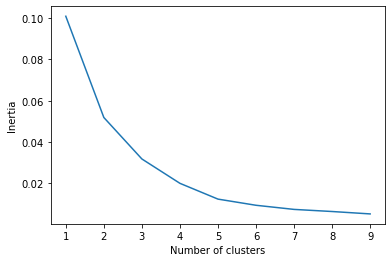

In [16]:
# Select appropriate cluster number
choose_k = toronto_area.drop(['Neighbourhood Id', 'Neighbourhood', 'Postal Code', 'Borough'], 1)

inertias = []
 
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(choose_k)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### KMeans Clustering - Create toronto_cluster DataFrame

In [17]:
# Create new dataframe
toronto_cluster = toronto_area
print("New Toronto dataframe shape: {}".format(toronto_cluster.shape))
print(type(toronto_cluster))

# KMeans clustering
k = 5 # Manually set from above 
toronto_clustering = toronto_cluster.drop(['Neighbourhood Id', 'Neighbourhood', 'Postal Code', 'Borough'], 1)
kmeans = KMeans(n_clusters = k, random_state = 0).fit(toronto_clustering)
# kmeans.labels_

# New dataframe - Create new dataframe to include cluster label
toronto_cluster.insert(0, 'Cluster Labels', kmeans.labels_)

# Space
print()

toronto_cluster

New Toronto dataframe shape: (40, 6)
<class 'pandas.core.frame.DataFrame'>



,Cluster Labels,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude
62,1,63,The Beaches,East Toronto,M4E,43.676357,-79.293031
63,1,64,Woodbine Corridor,East Toronto,M4E,43.676357,-79.293031
64,1,65,Greenwood-Coxwell,East Toronto,M4L,43.668999,-79.315572
65,1,66,Danforth,East Toronto,M4C,43.695344,-79.318389
66,4,67,Playter Estates-Danforth,East Toronto,M4K,43.679557,-79.352188
67,4,68,North Riverdale,East Toronto,M4K,43.679557,-79.352188
68,4,69,Blake-Jones,East Toronto,M4J,43.685347,-79.338106
69,4,70,South Riverdale,East Toronto,M4K,43.679557,-79.352188
70,4,71,Cabbagetown-South St.James Town,Downtown Toronto,M4X,43.667967,-79.367675
71,4,72,Regent Park,Downtown Toronto,M5A,43.654260,-79.360636


#### Visualize Toronto - 5 cluster neighbourhood -- Set parameters

In [18]:
# Example: map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="tor_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# Verify variables chosen
print('Chosen latitude variable: {}'.format(latitude))
print('Chosen longitude variable: {}'.format(longitude))
print('Chosen k cluster variable: {}'.format(k))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.
Chosen latitude variable: 43.6534817
Chosen longitude variable: -79.3839347
Chosen k cluster variable: 5


#### Visualize Toronto - 5 cluster neighbourhood -- Create map

#### NOTE: The map has less markers is due to the overlay of neighbourhoods in the same (latitude and longitude) coordinates compared to the output shape provided by the toronto_cluster DataFrame.

In [19]:
# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# Set color scheme for the clusters
kclusters = k # Manually set from above
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 0.5, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_cluster['Latitude'], toronto_cluster['Longitude'], toronto_cluster['Neighbourhood'], toronto_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##### NOTE: The Folium Map may not render on GitHub. I have added images in the repository. 
##### https://github.com/zer0-zer0-edward/Coursera_Capstone
##### Image is https://github.com/zer0-zer0-edward/Coursera_Capstone/blob/main/202104530_Capstone_Project_Week-5_Folium_1.png

#### Data Exploration 1.5 - Demographics

In [20]:
# Subset select - 2011 gender ranges
sub_demo_df_2_gen = sub_demo_df_2[['Neighbourhood', 'Pop - Males', 'Pop - Females']]
print('Maximum Male Population: {}'.format(sub_demo_df_2_gen['Pop - Males'].max()))
print('Average Male Population: {}'.format(sub_demo_df_2_gen['Pop - Males'].mean()))
print('Minimum Male Population: {}'.format(sub_demo_df_2_gen['Pop - Males'].min()))
print()
print('Maximum Female Population: {}'.format(sub_demo_df_2_gen['Pop - Females'].max()))
print('Average Female Population: {}'.format(sub_demo_df_2_gen['Pop - Females'].mean()))
print('Minimum Female Population: {}'.format(sub_demo_df_2_gen['Pop - Females'].min()))

Maximum Male Population: 21735
Average Male Population: 8274.5
Minimum Male Population: 3760

Maximum Female Population: 21630
Average Female Population: 8623.5
Minimum Female Population: 3890


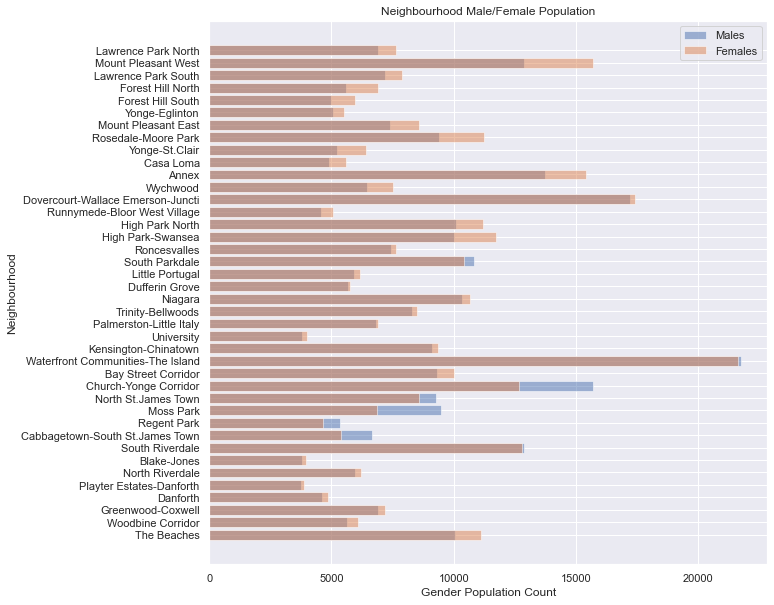

In [21]:
# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(sub_demo_df_2_gen['Neighbourhood'], sub_demo_df_2_gen['Pop - Males'], label='Males', alpha=0.5)
plt.barh(sub_demo_df_2_gen['Neighbourhood'], sub_demo_df_2_gen['Pop - Females'], label='Females', alpha=0.5)
plt.title('Neighbourhood Male/Female Population')
plt.xlabel('Gender Population Count')
plt.ylabel('Neighbourhood')
plt.legend()
plt.show()

##### COMMENT (ABOVE): Toronto "only" neighbourhoods are not as crowded. More Neighbourhoods with more female than male populous.

#### Data Exploration 1.5 - Housing

In [22]:
# Housing
sub_hous_df_2_typ = sub_hous_df_2[['Neighbourhood', 'Borough', 'Mid-Century Highrise Households',
                                   'Mid-Century Highrise Population', 'Social Housing Units']]

print('Maximum Highrise Household: {}'.format(sub_hous_df_2_typ['Mid-Century Highrise Households'].max()))
print('Average highrise Household: {}'.format(sub_hous_df_2_typ['Mid-Century Highrise Households'].mean()))
print('Minimum highrise Household: {}'.format(sub_hous_df_2_typ['Mid-Century Highrise Households'].min()))
print()
print('Maximum Highrise Population: {}'.format(sub_hous_df_2_typ['Mid-Century Highrise Population'].max()))
print('Average Highrise Population: {}'.format(sub_hous_df_2_typ['Mid-Century Highrise Population'].mean()))
print('Minimum Highrise Population: {}'.format(sub_hous_df_2_typ['Mid-Century Highrise Population'].min()))
print()
print('Maximum Social Housing Units: {}'.format(sub_hous_df_2_typ['Social Housing Units'].max()))
print('Average Social Housing Units: {}'.format(sub_hous_df_2_typ['Social Housing Units'].mean()))
print('Minimum Social Housing Units: {}'.format(sub_hous_df_2_typ['Social Housing Units'].min()))

Maximum Highrise Household: 8410
Average highrise Household: 1971.875
Minimum highrise Household: 0

Maximum Highrise Population: 13070
Average Highrise Population: 3240.875
Minimum Highrise Population: 0

Maximum Social Housing Units: 3990
Average Social Housing Units: 941.1
Minimum Social Housing Units: 0


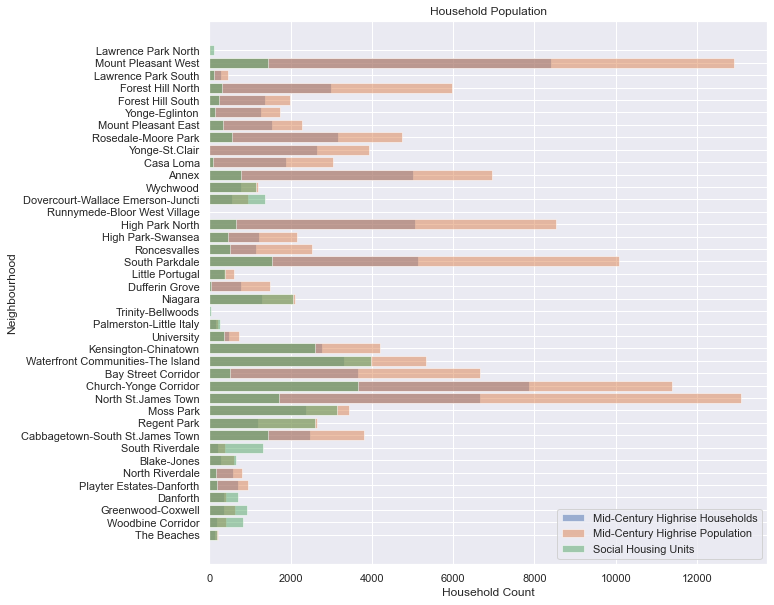

In [23]:
# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(sub_hous_df_2_typ['Neighbourhood'], sub_hous_df_2_typ['Mid-Century Highrise Households'], label='Mid-Century Highrise Households', alpha=0.5)
plt.barh(sub_hous_df_2_typ['Neighbourhood'], sub_hous_df_2_typ['Mid-Century Highrise Population'], label='Mid-Century Highrise Population', alpha=0.5)
plt.barh(sub_hous_df_2_typ['Neighbourhood'], sub_hous_df_2_typ['Social Housing Units'], label='Social Housing Units', alpha=0.5)
plt.title('Household Population')
plt.xlabel('Household Count')
plt.ylabel('Neighbourhood')
plt.legend()
plt.show()

##### COMMENT (ABOVE): Need more information about other types of household other than highrises.

#### Data Exploration 1.5 - Safety

In [24]:
# Safety
sub_safe_df_2_typ = sub_safe_df_2[['Neighbourhood', 'Borough',
                                   'Assaults', 'Vehicle Thefts', 'Break & Enters',
                                   'Robberies', 'Thefts', 'Murders']]

print('Maximum Assaults: {}'.format(sub_safe_df_2_typ['Assaults'].max()))
print('Average Assaults: {}'.format(sub_safe_df_2_typ['Assaults'].mean()))
print('Minimum Assaults: {}'.format(sub_safe_df_2_typ['Assaults'].min()))
print()
print('Maximum Vehicle Thefts: {}'.format(sub_safe_df_2_typ['Vehicle Thefts'].max()))
print('Average Vehicle Thefts: {}'.format(sub_safe_df_2_typ['Vehicle Thefts'].mean()))
print('Minimum Vehicle Thefts: {}'.format(sub_safe_df_2_typ['Vehicle Thefts'].min()))
print()
print('Maximum Break & Enters: {}'.format(sub_safe_df_2_typ['Break & Enters'].max()))
print('Average Break & Enters: {}'.format(sub_safe_df_2_typ['Break & Enters'].mean()))
print('Minimum Break & Enters: {}'.format(sub_safe_df_2_typ['Break & Enters'].min()))
print()
print('Maximum Robberies: {}'.format(sub_safe_df_2_typ['Robberies'].max()))
print('Average Robberies: {}'.format(sub_safe_df_2_typ['Robberies'].mean()))
print('Minimum Robberies: {}'.format(sub_safe_df_2_typ['Robberies'].min()))
print()
print('Maximum Murders: {}'.format(sub_safe_df_2_typ['Murders'].max()))
print('Average Murders: {}'.format(sub_safe_df_2_typ['Murders'].mean()))
print('Minimum Murders: {}'.format(sub_safe_df_2_typ['Murders'].min()))

Maximum Assaults: 892
Average Assaults: 180.9
Minimum Assaults: 19

Maximum Vehicle Thefts: 62
Average Vehicle Thefts: 19.225
Minimum Vehicle Thefts: 3

Maximum Break & Enters: 182
Average Break & Enters: 82.975
Minimum Break & Enters: 33

Maximum Robberies: 124
Average Robberies: 32.4
Minimum Robberies: 3

Maximum Murders: 1
Average Murders: 0.275
Minimum Murders: 0


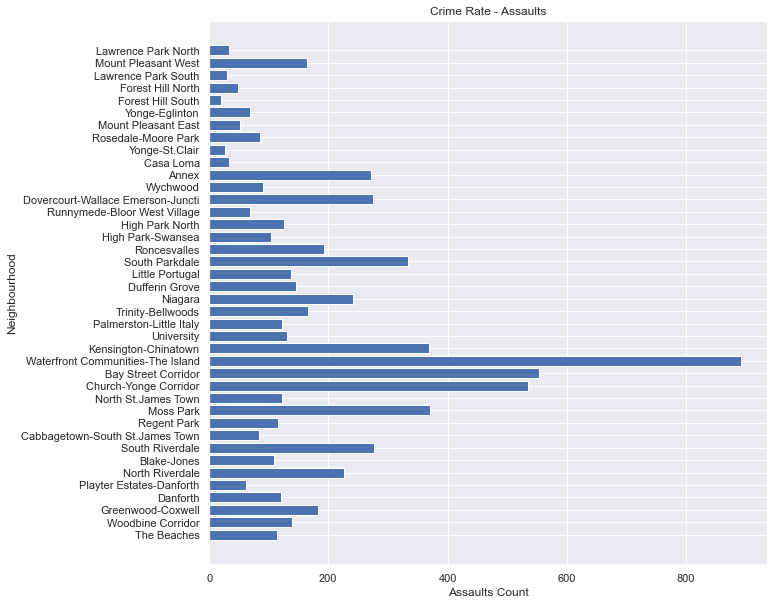

In [25]:
# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(sub_safe_df_2_typ['Neighbourhood'], sub_safe_df_2_typ['Assaults'])
plt.title('Crime Rate - Assaults')
plt.xlabel('Assaults Count')
plt.ylabel('Neighbourhood')
plt.show()

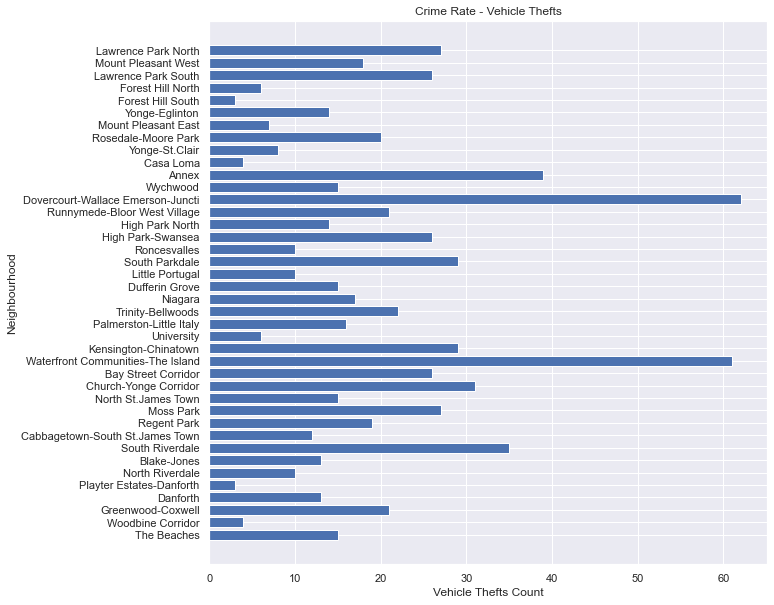

In [26]:
# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(sub_safe_df_2_typ['Neighbourhood'], sub_safe_df_2_typ['Vehicle Thefts'])
plt.title('Crime Rate - Vehicle Thefts')
plt.xlabel('Vehicle Thefts Count')
plt.ylabel('Neighbourhood')
plt.show()

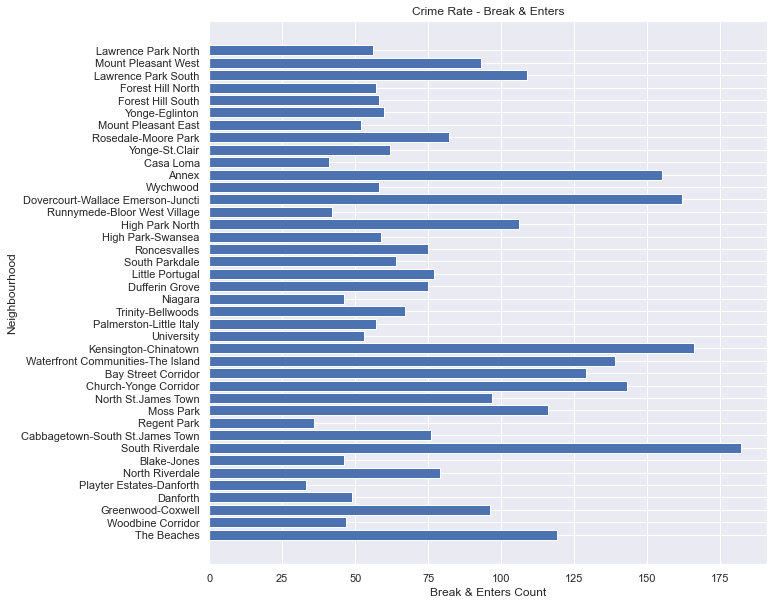

In [27]:
# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(sub_safe_df_2_typ['Neighbourhood'], sub_safe_df_2_typ['Break & Enters'])
plt.title('Crime Rate - Break & Enters')
plt.xlabel('Break & Enters Count')
plt.ylabel('Neighbourhood')
plt.show()

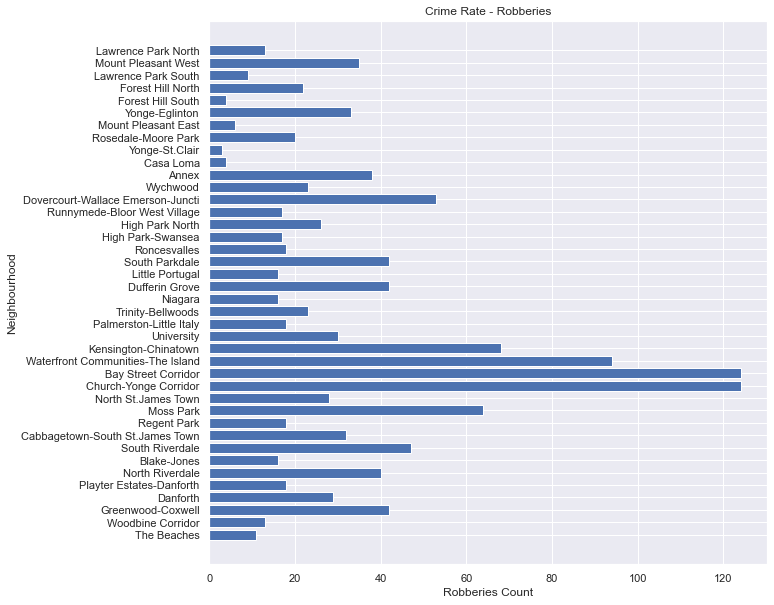

In [28]:
# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(sub_safe_df_2_typ['Neighbourhood'], sub_safe_df_2_typ['Robberies'])
plt.title('Crime Rate - Robberies')
plt.xlabel('Robberies Count')
plt.ylabel('Neighbourhood')
plt.show()

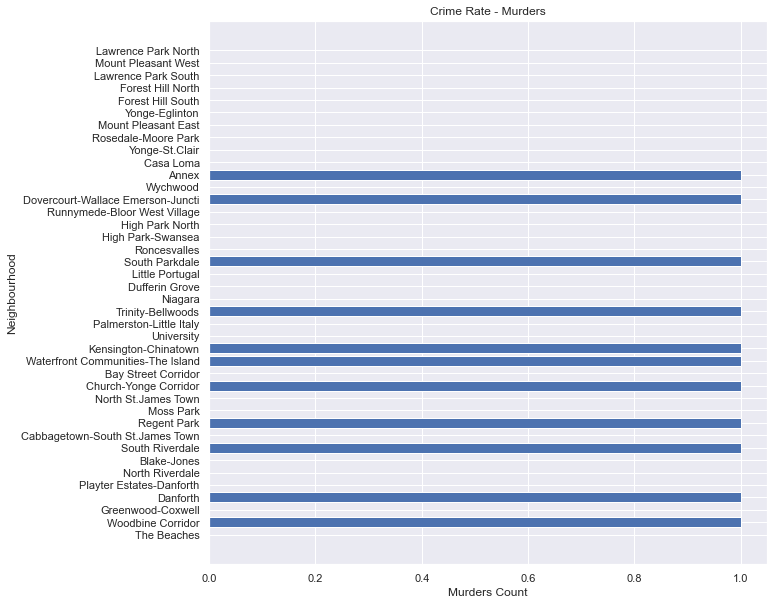

In [29]:
# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(sub_safe_df_2_typ['Neighbourhood'], sub_safe_df_2_typ['Murders'])
plt.title('Crime Rate - Murders')
plt.xlabel('Murders Count')
plt.ylabel('Neighbourhood')
plt.show()

##### COMMENT (ABOVE): Murder/Homicide Rate does not go beyond 1. Selected neighbourhoods are good based on this one factor.

#### Analysis-3 -- Neighbourhood selection process

#### Choose which neighbourhood to analyze (Main - 2011 datasets)

In [30]:
# Subset select - 2011 recorded Asian languages
sub_demo_df_3 = sub_demo_df_2[['Neighbourhood',
                                   '   Language - Chinese', '   Language - Korean',
                                   '   Language - Tagalog', '   Language - Tamil']]

sub_demo_df_3.head()

,Neighbourhood,Language - Chinese,Language - Korean,Language - Tagalog,Language - Tamil
62,The Beaches,245,45,85,25
63,Woodbine Corridor,615,45,70,25
64,Greenwood-Coxwell,1910,35,115,55
65,Danforth,625,45,65,10
66,Playter Estates-Danforth,205,30,60,10


In [31]:
# Check where maximum and minimum provided Asian languages are located 
lang_chi_max = sub_demo_df_3[sub_demo_df_3['   Language - Chinese'] == sub_demo_df_3['   Language - Chinese'].max()]
print(lang_chi_max[['Neighbourhood', '   Language - Chinese']])
lang_chi_min = sub_demo_df_3[sub_demo_df_3['   Language - Chinese'] == sub_demo_df_3['   Language - Chinese'].min()]
print(lang_chi_min[['Neighbourhood', '   Language - Chinese']])
print()

lang_kor_max = sub_demo_df_3[sub_demo_df_3['   Language - Korean'] == sub_demo_df_3['   Language - Korean'].max()]
print(lang_kor_max[['Neighbourhood', '   Language - Korean']])
lang_kor_min = sub_demo_df_3[sub_demo_df_3['   Language - Korean'] == sub_demo_df_3['   Language - Korean'].min()]
print(lang_kor_min[['Neighbourhood', '   Language - Korean']])
print()

lang_tag_max = sub_demo_df_3[sub_demo_df_3['   Language - Tagalog'] == sub_demo_df_3['   Language - Tagalog'].max()]
print(lang_tag_max[['Neighbourhood', '   Language - Tagalog']])
lang_tag_min = sub_demo_df_3[sub_demo_df_3['   Language - Tagalog'] == sub_demo_df_3['   Language - Tagalog'].min()]
print(lang_tag_min[['Neighbourhood', '   Language - Tagalog']])
print()

lang_tam_max = sub_demo_df_3[sub_demo_df_3['   Language - Tamil'] == sub_demo_df_3['   Language - Tamil'].max()]
print(lang_tam_max[['Neighbourhood', '   Language - Tamil']])
lang_tam_min = sub_demo_df_3[sub_demo_df_3['   Language - Tamil'] == sub_demo_df_3['   Language - Tamil'].min()]
print(lang_tam_min[['Neighbourhood', '   Language - Tamil']])

           Neighbourhood     Language - Chinese
77  Kensington-Chinatown                   6070
         Neighbourhood     Language - Chinese
100  Forest Hill South                    180

          Neighbourhood     Language - Korean
75  Bay Street Corridor                   815
   Neighbourhood     Language - Korean
68   Blake-Jones                    20

          Neighbourhood     Language - Tagalog
73  North St.James Town                   1560
   Neighbourhood     Language - Tagalog
78    University                     40

          Neighbourhood     Language - Tamil
73  North St.James Town                  915
               Neighbourhood     Language - Tamil
79   Palmerston-Little Italy                    0
100        Forest Hill South                    0


##### COMMENT (ABOVE): Only a handful of Asian languages recorded in this dataset. Other Asian languages may be under-represented.

In [32]:
# Economics
sub_econ_df_3 = sub_econ_df_2[['Neighbourhood', 'Businesses', 'Child Care Spaces', 'Debt Risk Score',
                               'Home Prices', 'Local Employment']]

sub_econ_df_3.head()

,Neighbourhood,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment
62,The Beaches,531,167,764,751945,5694
63,Woodbine Corridor,146,214,749,521549,1896
64,Greenwood-Coxwell,315,94,738,490920,2342
65,Danforth,414,152,755,585093,2786
66,Playter Estates-Danforth,301,162,757,842668,2243


In [33]:
# Environment
sub_envi_df_3 = sub_envi_df_2[['Neighbourhood', 'Green Spaces', 'Pollutant Carcinogenic TEP Score',
                               'Pollutants Released to Air', 'Tree Cover']]

sub_envi_df_3.head()

,Neighbourhood,Green Spaces,Pollutant Carcinogenic TEP Score,Pollutants Released to Air,Tree Cover
62,The Beaches,0.614909,175.68,58703,1.416720e+06
63,Woodbine Corridor,0.104449,0.00,1,6.699423e+05
64,Greenwood-Coxwell,0.087044,0.00,1358,5.301931e+05
65,Danforth,0.001837,0.00,0,2.822127e+05
66,Playter Estates-Danforth,0.059229,487.68,508,3.134337e+05


In [34]:
# Health
sub_heal_df_3 = sub_heal_df_2[['Neighbourhood', 'DineSafe Inspections', 'Female Fertility',
                               'Health Providers', 'Student Nutrition']]

sub_heal_df_3.head()

,Neighbourhood,DineSafe Inspections,Female Fertility,Health Providers,Student Nutrition
62,The Beaches,5,41.247426,24,0
63,Woodbine Corridor,2,53.838384,11,975
64,Greenwood-Coxwell,11,45.447348,23,2030
65,Danforth,3,46.332046,53,320
66,Playter Estates-Danforth,13,34.488068,37,0


In [35]:
sub_safe_df_3 = sub_safe_df_2[['Neighbourhood', 'Fire Medical Calls','Fire Vehicle Incidents',
                               'Fires & Fire Alarms', 'Hazardous Incidents','Total Major Crime Incidents']]

sub_safe_df_3.head()

,Neighbourhood,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Total Major Crime Incidents
62,The Beaches,369,23,165,162,292
63,Woodbine Corridor,445,30,125,95,239
64,Greenwood-Coxwell,461,40,148,98,392
65,Danforth,491,59,119,72,262
66,Playter Estates-Danforth,363,47,104,45,146


#### Combine some of the 2011 datasets

In [36]:
# Combine chosen 2011 datasets together
# Example - sub_safe_df = main_merge_df.merge(tor_safe_df, how='left', left_on='Neighbourhood Id', right_on='Neighbourhood Id')

# Assign subset list
tor_sub_2011_df_list = [sub_demo_df_3, sub_econ_df_3, sub_envi_df_3, sub_heal_df_3, sub_safe_df_3]

# Create a subset from two DataFrames with inner join
tor_sub_merge_2011 = reduce(lambda left, right: pd.merge(left, right, on=['Neighbourhood'], how='left'), tor_sub_2011_df_list)

# Verify joined columns
print(tor_sub_merge_2011.columns)
tor_sub_merge_2011.head()

Index(['Neighbourhood', '   Language - Chinese', '   Language - Korean',
       '   Language - Tagalog', '   Language - Tamil', 'Businesses',
       'Child Care Spaces', 'Debt Risk Score', 'Home Prices',
       'Local Employment', 'Green Spaces', 'Pollutant Carcinogenic TEP Score',
       'Pollutants Released to Air', 'Tree Cover', 'DineSafe Inspections',
       'Female Fertility', 'Health Providers', 'Student Nutrition',
       'Fire Medical Calls', 'Fire Vehicle Incidents', 'Fires & Fire Alarms',
       'Hazardous Incidents', 'Total Major Crime Incidents'],
      dtype='object')


,Neighbourhood,Language - Chinese,Language - Korean,Language - Tagalog,Language - Tamil,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,...,Tree Cover,DineSafe Inspections,Female Fertility,Health Providers,Student Nutrition,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Total Major Crime Incidents
0,The Beaches,245,45,85,25,531,167,764,751945,5694,...,1.416720e+06,5,41.247426,24,0,369,23,165,162,292
1,Woodbine Corridor,615,45,70,25,146,214,749,521549,1896,...,6.699423e+05,2,53.838384,11,975,445,30,125,95,239
2,Greenwood-Coxwell,1910,35,115,55,315,94,738,490920,2342,...,5.301931e+05,11,45.447348,23,2030,461,40,148,98,392
3,Danforth,625,45,65,10,414,152,755,585093,2786,...,2.822127e+05,3,46.332046,53,320,491,59,119,72,262
4,Playter Estates-Danforth,205,30,60,10,301,162,757,842668,2243,...,3.134337e+05,13,34.488068,37,0,363,47,104,45,146


#### Safety subset - Testing and Data Exploration

In [37]:
# Create new subset for testing and data exploration
tor_sub_merge_2011_test = tor_sub_merge_2011
tor_sub_merge_2011_test.head()

,Neighbourhood,Language - Chinese,Language - Korean,Language - Tagalog,Language - Tamil,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,...,Tree Cover,DineSafe Inspections,Female Fertility,Health Providers,Student Nutrition,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Total Major Crime Incidents
0,The Beaches,245,45,85,25,531,167,764,751945,5694,...,1.416720e+06,5,41.247426,24,0,369,23,165,162,292
1,Woodbine Corridor,615,45,70,25,146,214,749,521549,1896,...,6.699423e+05,2,53.838384,11,975,445,30,125,95,239
2,Greenwood-Coxwell,1910,35,115,55,315,94,738,490920,2342,...,5.301931e+05,11,45.447348,23,2030,461,40,148,98,392
3,Danforth,625,45,65,10,414,152,755,585093,2786,...,2.822127e+05,3,46.332046,53,320,491,59,119,72,262
4,Playter Estates-Danforth,205,30,60,10,301,162,757,842668,2243,...,3.134337e+05,13,34.488068,37,0,363,47,104,45,146


In [38]:
# Neighbourhood with the least amount of major crimes
safety_1 = tor_sub_merge_2011_test[['Neighbourhood', 'Total Major Crime Incidents']]
safety_1.sort_values(by=['Total Major Crime Incidents'], ascending=True)

,Neighbourhood,Total Major Crime Incidents
30,Casa Loma,91
35,Forest Hill South,92
31,Yonge-St.Clair,111
33,Mount Pleasant East,135
39,Lawrence Park North,141
4,Playter Estates-Danforth,146
36,Forest Hill North,155
26,Runnymede-Bloor West Village,165
37,Lawrence Park South,191
28,Wychwood,220


In [39]:
# Neighbourhood with the least amount of Fire-related incidents
safety_2 = tor_sub_merge_2011_test[['Neighbourhood', 'Fires & Fire Alarms']]
safety_2.sort_values(by=['Fires & Fire Alarms'], ascending=True)

,Neighbourhood,Fires & Fire Alarms
26,Runnymede-Bloor West Village,83
6,Blake-Jones,93
39,Lawrence Park North,104
4,Playter Estates-Danforth,104
3,Danforth,119
20,Dufferin Grove,119
1,Woodbine Corridor,125
5,North Riverdale,129
21,Little Portugal,129
28,Wychwood,140


In [40]:
# Neighbourhood with the least amount of Fire-related incidents
safety_3 = tor_sub_merge_2011_test[['Neighbourhood', 'Hazardous Incidents']]
safety_3.sort_values(by=['Hazardous Incidents'], ascending=True)

,Neighbourhood,Hazardous Incidents
6,Blake-Jones,43
4,Playter Estates-Danforth,45
31,Yonge-St.Clair,67
21,Little Portugal,70
3,Danforth,72
16,University,72
26,Runnymede-Bloor West Village,75
5,North Riverdale,75
30,Casa Loma,81
20,Dufferin Grove,81


In [41]:
# Neighbourhood with the least amount of combined incidents
safety_combo = tor_sub_merge_2011_test[['Neighbourhood', 'Total Major Crime Incidents',
                                    'Fires & Fire Alarms', 'Hazardous Incidents']]
safety_combo_2 = safety_combo[(safety_combo['Total Major Crime Incidents']<=350)
             & (safety_combo['Fires & Fire Alarms']<=250)
             & (safety_combo['Hazardous Incidents']<=150)]

#### NOTE: The parameters above are based on what the stakeholder may consider tolerable or adequate conditions.

In [42]:
# Verify subset combination
safety_combo_2

,Neighbourhood,Total Major Crime Incidents,Fires & Fire Alarms,Hazardous Incidents
1,Woodbine Corridor,239,125,95
3,Danforth,262,119,72
4,Playter Estates-Danforth,146,104,45
6,Blake-Jones,221,93,43
9,Regent Park,259,212,130
17,Palmerston-Little Italy,261,149,99
20,Dufferin Grove,348,119,81
21,Little Portugal,296,129,70
25,High Park North,309,225,101
26,Runnymede-Bloor West Village,165,83,75


#### Health subset - Testing and Data Exploration

In [43]:
# Neighbourhood with the least carcinogenic TEP score
health_1 = tor_sub_merge_2011_test[['Neighbourhood', 'Pollutant Carcinogenic TEP Score']]
health_1.sort_values(by=['Pollutant Carcinogenic TEP Score'], ascending=True)

,Neighbourhood,Pollutant Carcinogenic TEP Score
19,Niagara,0.00
28,Wychwood,0.00
25,High Park North,0.00
24,High Park-Swansea,0.00
22,South Parkdale,0.00
21,Little Portugal,0.00
20,Dufferin Grove,0.00
32,Rosedale-Moore Park,0.00
18,Trinity-Bellwoods,0.00
17,Palmerston-Little Italy,0.00


In [44]:
# Neighbourhood with the least amount of pollutants released
health_2 = tor_sub_merge_2011_test[['Neighbourhood', 'Pollutants Released to Air']]
health_2.sort_values(by=['Pollutants Released to Air'], ascending=True)

,Neighbourhood,Pollutants Released to Air
24,High Park-Swansea,0
31,Yonge-St.Clair,0
3,Danforth,0
17,Palmerston-Little Italy,0
5,North Riverdale,0
25,High Park North,0
34,Yonge-Eglinton,0
9,Regent Park,0
11,North St.James Town,0
32,Rosedale-Moore Park,0


In [45]:
# Neighbourhood with the most amount of healthcare providers
health_3 = tor_sub_merge_2011_test[['Neighbourhood', 'Health Providers']]
health_3.sort_values(by=['Health Providers'], ascending=False)

,Neighbourhood,Health Providers
29,Annex,198
13,Bay Street Corridor,187
38,Mount Pleasant West,135
12,Church-Yonge Corridor,89
24,High Park-Swansea,87
15,Kensington-Chinatown,82
30,Casa Loma,77
11,North St.James Town,74
34,Yonge-Eglinton,62
23,Roncesvalles,61


In [46]:
# Neighbourhood with of combined health perks
health_combo = tor_sub_merge_2011_test[['Neighbourhood', 'Pollutant Carcinogenic TEP Score',
                                    'Pollutants Released to Air', 'Health Providers']]
health_combo_2 = health_combo[(health_combo['Pollutant Carcinogenic TEP Score']<=100)
             & (health_combo['Pollutants Released to Air']<=1500)
             & (health_combo['Health Providers']>=50)]

#### NOTE: The parameters above are based on what the stakeholder may consider tolerable or adequate conditions.

In [47]:
# Verify subset combination
health_combo_2

,Neighbourhood,Pollutant Carcinogenic TEP Score,Pollutants Released to Air,Health Providers
3,Danforth,0.00,0,53
11,North St.James Town,0.00,0,74
12,Church-Yonge Corridor,42.24,1092,89
15,Kensington-Chinatown,0.00,1156,82
17,Palmerston-Little Italy,0.00,0,57
24,High Park-Swansea,0.00,0,87
29,Annex,53.76,188,198
30,Casa Loma,75.84,575,77
31,Yonge-St.Clair,0.00,0,56
34,Yonge-Eglinton,0.00,0,62


#### Create filtered DataFrame for final neighbourhood selection

In [48]:
# Merge (inner join) the two combo subset dataframes
safety_health_combo = safety_combo_2.merge(health_combo_2, how='inner', left_on='Neighbourhood', right_on='Neighbourhood')
safety_health_combo

,Neighbourhood,Total Major Crime Incidents,Fires & Fire Alarms,Hazardous Incidents,Pollutant Carcinogenic TEP Score,Pollutants Released to Air,Health Providers
0,Danforth,262,119,72,0.00,0,53
1,Palmerston-Little Italy,261,149,99,0.00,0,57
2,Casa Loma,91,236,81,75.84,575,77
3,Yonge-St.Clair,111,175,67,0.00,0,56
4,Yonge-Eglinton,229,147,115,0.00,0,62


In [49]:
# Merge (inner join) the two combo subset dataframes
toronto_cluster_filtered = toronto_cluster.merge(safety_health_combo, how='inner', 
                                                 left_on='Neighbourhood', right_on='Neighbourhood')
toronto_cluster_filtered

,Cluster Labels,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Total Major Crime Incidents,Fires & Fire Alarms,Hazardous Incidents,Pollutant Carcinogenic TEP Score,Pollutants Released to Air,Health Providers
0,1,66,Danforth,East Toronto,M4C,43.695344,-79.318389,262,119,72,0.00,0,53
1,2,80,Palmerston-Little Italy,Downtown Toronto,M6G,43.669542,-79.422564,261,149,99,0.00,0,57
2,0,96,Casa Loma,Central Toronto,M4V,43.686412,-79.400049,91,236,81,75.84,575,77
3,0,97,Yonge-St.Clair,Central Toronto,M4V,43.686412,-79.400049,111,175,67,0.00,0,56
4,0,100,Yonge-Eglinton,Central Toronto,M4P,43.712751,-79.390197,229,147,115,0.00,0,62


#### NOTE: Columns (or rows) with zero value may be deceptive as it may indicate that there was no recorded value for that certain feature. These non-value features will be avoided from the neighbourhood selection process. These non-value features were not removed during the data cleaning process is to ensure all other column features are represented for each Toronto neighbourhood and provide better assessment as needed. 

#### Visualize Toronto - Filtered neighbourhoods -- Create map

#### NOTE: The map has less markers is due to the overlay of neighbourhoods in the same (latitude and longitude) coordinates compared to the output shape provided by the toronto_cluster_filtered DataFrame.

In [50]:
# New k value based on toronto_cluster_filtered['Cluster Labels'] above
new_k = 3

##### COMMENT (ABOVE): New cluster (k) count is based on "Cluster Labels" column.

In [51]:
# Create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# Set color scheme for the clusters
kclusters = new_k # Manually set from above
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_cluster_filtered['Latitude'], toronto_cluster_filtered['Longitude'], toronto_cluster_filtered['Neighbourhood'], toronto_cluster_filtered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##### NOTE: The Folium Map may not render on GitHub. I have added images in the repository. 
##### https://github.com/zer0-zer0-edward/Coursera_Capstone
##### Image is https://github.com/zer0-zer0-edward/Coursera_Capstone/blob/main/202104530_Capstone_Project_Week-5_Folium_2.png

#### Data Exploration 2.0 -- Casa Loma Comparison + Extra Data Assessment for chosen neighbourhood

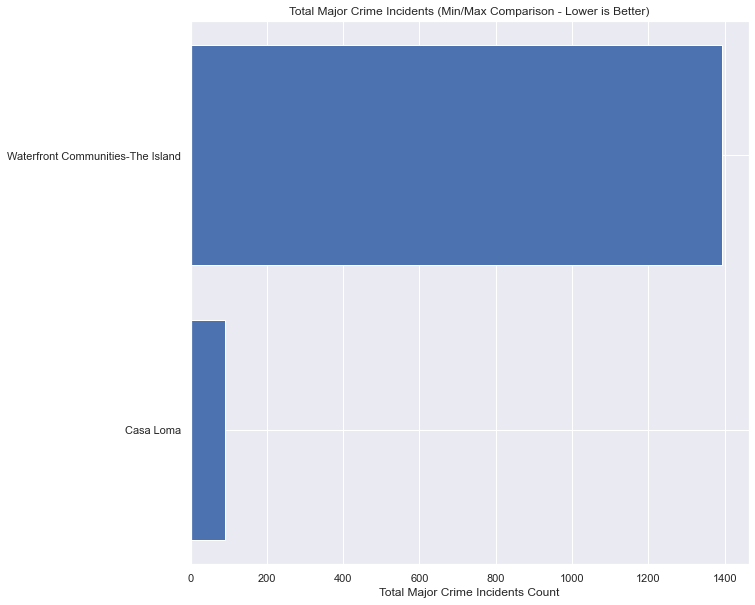

In [52]:
# Total Major Crime Incidents
safety_compare_1 = safety_1.iloc[[30, 14]]

# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(safety_compare_1['Neighbourhood'], safety_compare_1['Total Major Crime Incidents'])
plt.title('Total Major Crime Incidents (Min/Max Comparison - Lower is Better)')
plt.xlabel('Total Major Crime Incidents Count')
plt.show()

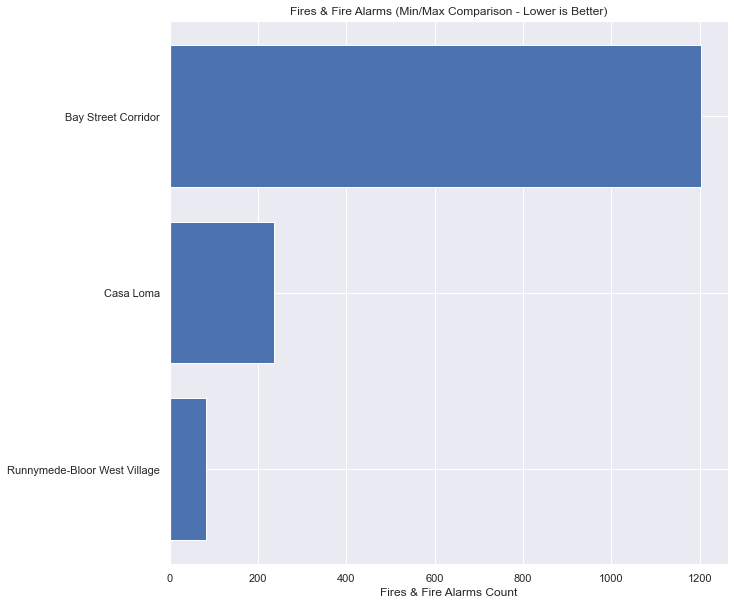

In [53]:
# Fires & Fire Alarms
safety_compare_2 = safety_2.iloc[[26, 30, 13]]

# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(safety_compare_2['Neighbourhood'], safety_compare_2['Fires & Fire Alarms'])
plt.title('Fires & Fire Alarms (Min/Max Comparison - Lower is Better)')
plt.xlabel('Fires & Fire Alarms Count')
plt.show()

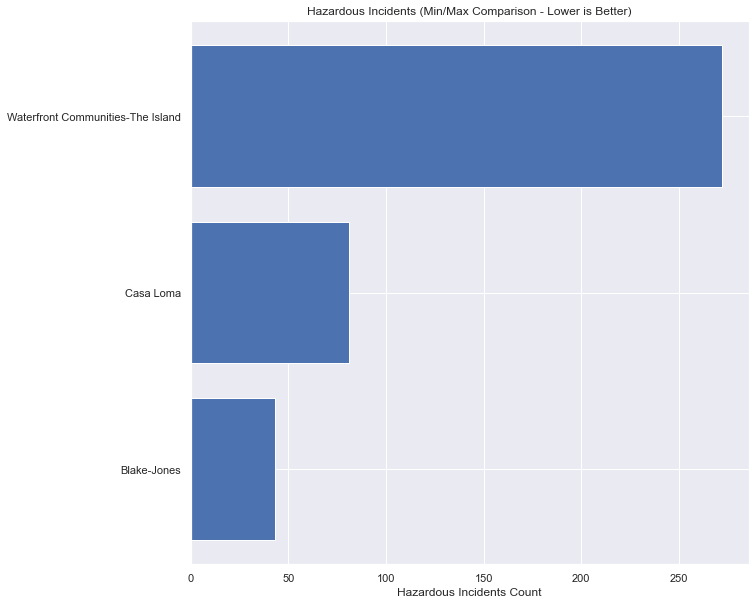

In [54]:
# Hazardous Incidents
safety_compare_3 = safety_3.iloc[[6, 30, 14]]

# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(safety_compare_3['Neighbourhood'], safety_compare_3['Hazardous Incidents'])
plt.title('Hazardous Incidents (Min/Max Comparison - Lower is Better)')
plt.xlabel('Hazardous Incidents Count')
plt.show()

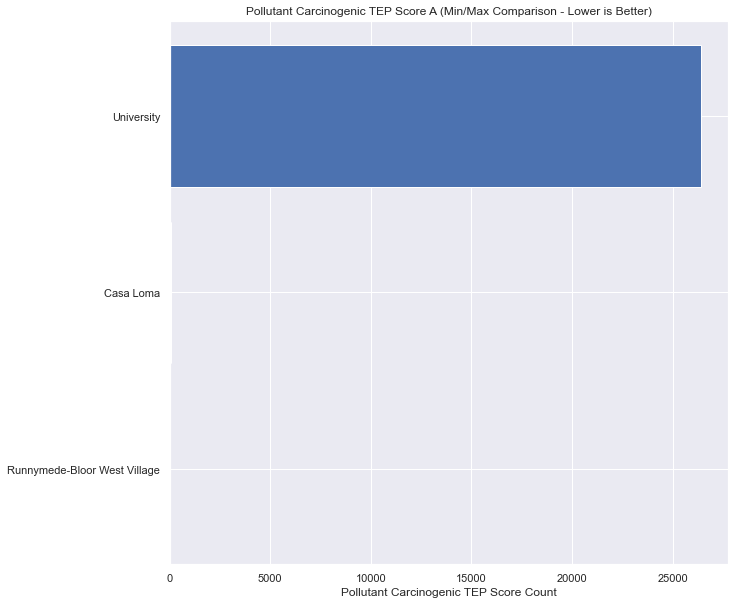

In [55]:
# Pollutant Carcinogenic TEP Score
health_compare_1a = health_1.iloc[[26, 30, 16]]

# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(health_compare_1a['Neighbourhood'], health_compare_1a['Pollutant Carcinogenic TEP Score'])
plt.title('Pollutant Carcinogenic TEP Score A (Min/Max Comparison - Lower is Better)')
plt.xlabel('Pollutant Carcinogenic TEP Score Count')
plt.show()

##### COMMENT (ABOVE): Casa Loma and minimum count are very miniscule in terms of count - very good in comparison.

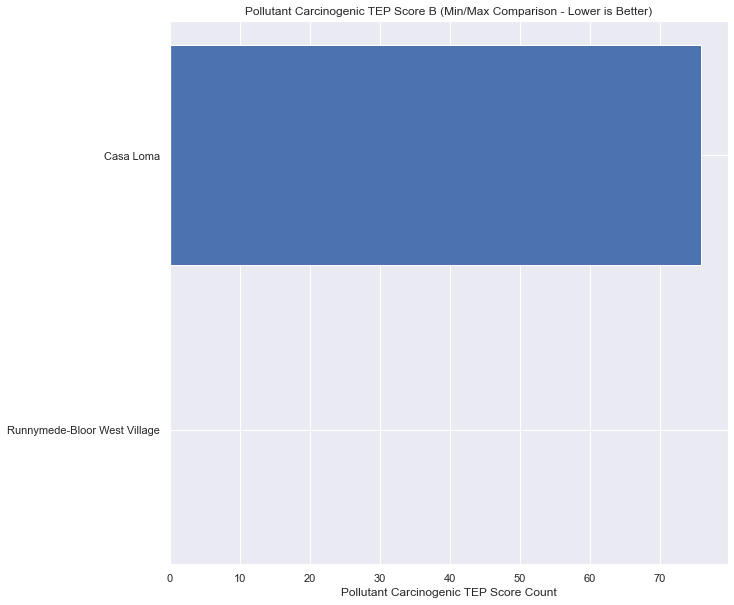

In [56]:
# Pollutant Carcinogenic TEP Score
health_compare_1b = health_1.iloc[[26, 30]]

# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(health_compare_1b['Neighbourhood'], health_compare_1b['Pollutant Carcinogenic TEP Score'])
plt.title('Pollutant Carcinogenic TEP Score B (Min/Max Comparison - Lower is Better)')
plt.xlabel('Pollutant Carcinogenic TEP Score Count')
plt.show()

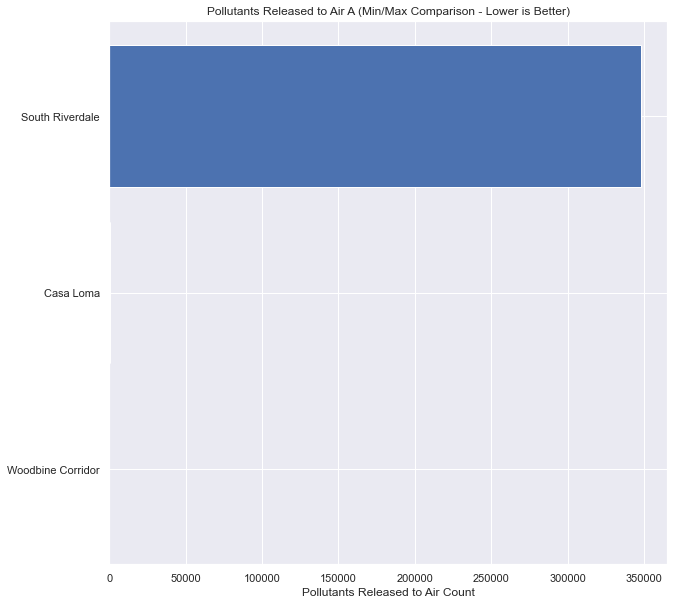

In [57]:
# Pollutants Released to Air
health_compare_2a = health_2.iloc[[1, 30, 7]]

# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(health_compare_2a['Neighbourhood'], health_compare_2a['Pollutants Released to Air'])
plt.title('Pollutants Released to Air A (Min/Max Comparison - Lower is Better)')
plt.xlabel('Pollutants Released to Air Count')
plt.show()

##### COMMENT (ABOVE): Casa Loma and minimum count are very miniscule in terms of count - very good in comparison.

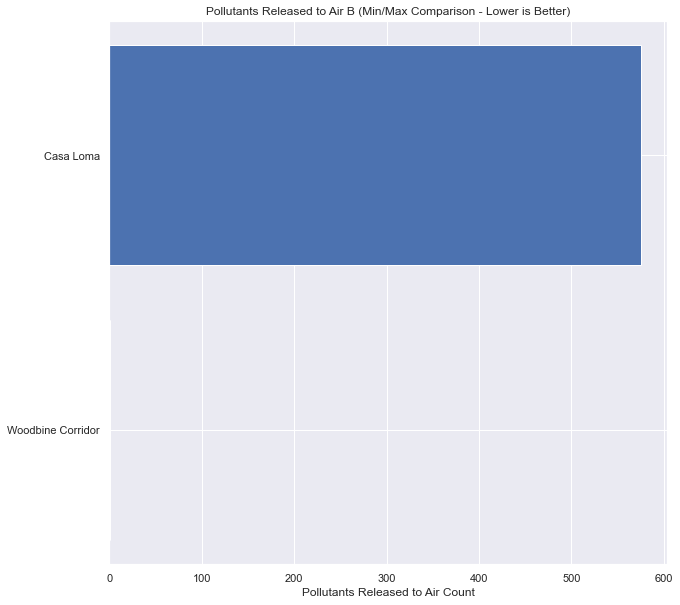

In [58]:
# Pollutants Released to Air
health_compare_2b = health_2.iloc[[1, 30]]

# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(health_compare_2b['Neighbourhood'], health_compare_2b['Pollutants Released to Air'])
plt.title('Pollutants Released to Air B (Min/Max Comparison - Lower is Better)')
plt.xlabel('Pollutants Released to Air Count')
plt.show()

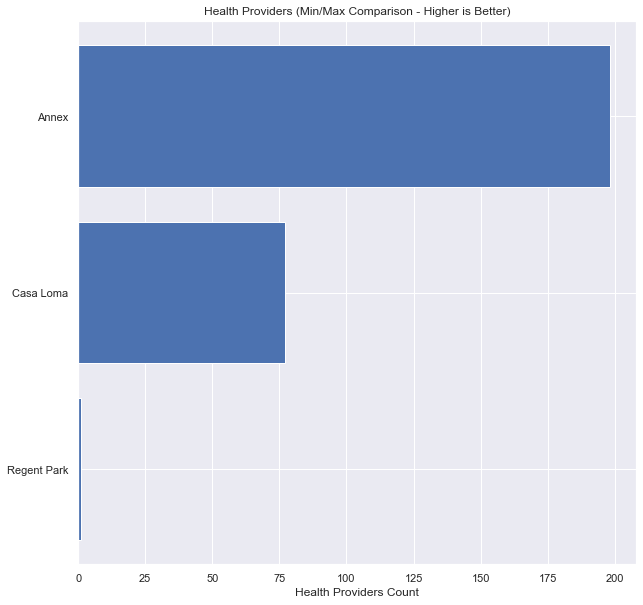

In [59]:
# Health Providers
health_compare_3 = health_3.iloc[[9, 30, 29]]

# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(health_compare_3['Neighbourhood'], health_compare_3['Health Providers'])
plt.title('Health Providers (Min/Max Comparison - Higher is Better)')
plt.xlabel('Health Providers Count')
plt.show()

#### Data Exploration 2.0 -- Updated datasets: Crime difference 2011 versus 2020

In [60]:
# Remove Borough column
sub_safe_df_2_typ_2 = sub_safe_df_2_typ
sub_safe_df_2_typ_2.pop('Borough')
sub_safe_df_2_typ_2.head()

,Neighbourhood,Assaults,Vehicle Thefts,Break & Enters,Robberies,Thefts,Murders
62,The Beaches,114,15,119,11,7,0
63,Woodbine Corridor,139,4,47,13,1,1
64,Greenwood-Coxwell,183,21,96,42,2,0
65,Danforth,121,13,49,29,3,1
66,Playter Estates-Danforth,62,3,33,18,4,0


In [61]:
# Assign new subset for chosen neighbourhood
casa_2011 = sub_safe_df_2_typ_2.loc[sub_safe_df_2_typ_2['Neighbourhood'] == 'Casa Loma']

In [62]:
# Assign new subset for 2020 Crime Rates
sub_crim_df_2_cri = sub_crim_df_2[['Neighbourhood', 'Borough', 
                                   'Assault_2020', 'AutoTheft_2020', 'BreakAndEnter_2020', 'Robbery_2020',
                                   'TheftOver_2020', 'Homicide_2020']]

sub_crim_df_2_cri.pop('Borough')
sub_crim_df_2_cri.head()

,Neighbourhood,Assault_2020,AutoTheft_2020,BreakAndEnter_2020,Robbery_2020,TheftOver_2020,Homicide_2020
62,The Beaches,84,23,66,6,10,0
63,Woodbine Corridor,68,11,34,7,4,0
64,Greenwood-Coxwell,114,29,41,21,4,2
65,Danforth,65,7,40,19,2,0
66,Playter Estates-Danforth,77,7,50,8,7,0


In [63]:
# Rename 2020 subset columns
sub_crim_df_2_cri.rename(columns = {'Assault_2020':'Assaults',
                                    'AutoTheft_2020':'Vehicle Thefts',
                                    'BreakAndEnter_2020':'Break & Enters',
                                    'Robbery_2020':'Robberies',
                                    'TheftOver_2020':'Thefts',
                                    'Homicide_2020':'Murders'}, inplace = True)

# Verify subset
sub_crim_df_2_cri.head()

C:\anaconda\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Neighbourhood,Assaults,Vehicle Thefts,Break & Enters,Robberies,Thefts,Murders
62,The Beaches,84,23,66,6,10,0
63,Woodbine Corridor,68,11,34,7,4,0
64,Greenwood-Coxwell,114,29,41,21,4,2
65,Danforth,65,7,40,19,2,0
66,Playter Estates-Danforth,77,7,50,8,7,0


In [64]:
# Assign new subset for 2020 Crime Rates (Renamed columns)
casa_2020 = sub_crim_df_2_cri.loc[sub_crim_df_2_cri['Neighbourhood'] == 'Casa Loma']

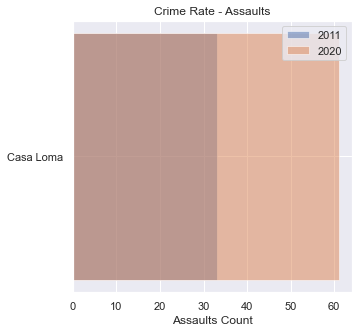

In [65]:
# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(5, 5))
plt.barh(casa_2011['Neighbourhood'], casa_2011['Assaults'], label='2011', alpha=0.5)
plt.barh(casa_2020['Neighbourhood'], casa_2020['Assaults'], label='2020', alpha=0.5)
plt.title('Crime Rate - Assaults')
plt.xlabel('Assaults Count')
plt.legend()
plt.show()

##### COMMENT (ABOVE): Approximately 50% increase in the Casa Loma Neighbourhood. May be correlated to more population count.

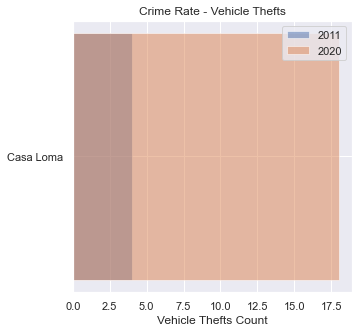

In [66]:
# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(5, 5))
plt.barh(casa_2011['Neighbourhood'], casa_2011['Vehicle Thefts'], label='2011', alpha=0.5)
plt.barh(casa_2020['Neighbourhood'], casa_2020['Vehicle Thefts'], label='2020', alpha=0.5)
plt.title('Crime Rate - Vehicle Thefts')
plt.xlabel('Vehicle Thefts Count')
plt.legend()
plt.show()

##### COMMENT (ABOVE): Approximately 250% increase in the Casa Loma Neighbourhood. May be correlated to more population count.

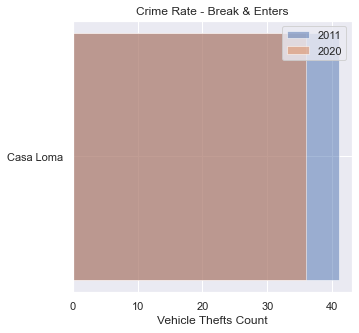

In [67]:
# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(5, 5))
plt.barh(casa_2011['Neighbourhood'], casa_2011['Break & Enters'], label='2011', alpha=0.5)
plt.barh(casa_2020['Neighbourhood'], casa_2020['Break & Enters'], label='2020', alpha=0.5)
plt.title('Crime Rate - Break & Enters')
plt.xlabel('Vehicle Thefts Count')
plt.legend()
plt.show()

##### COMMENT (ABOVE): Approximately 10% decrease in the Casa Loma Neighbourhood. May be correlated to more population count.

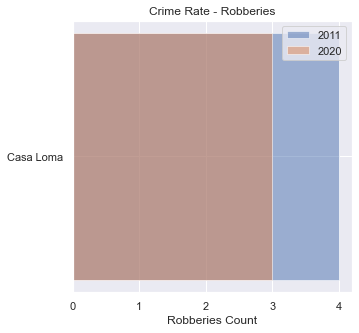

In [68]:
# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(5, 5))
plt.barh(casa_2011['Neighbourhood'], casa_2011['Robberies'], label='2011', alpha=0.5)
plt.barh(casa_2020['Neighbourhood'], casa_2020['Robberies'], label='2020', alpha=0.5)
plt.title('Crime Rate - Robberies')
plt.xlabel('Robberies Count')
plt.legend()
plt.show()

##### COMMENT (ABOVE): Approximately 20% decrease in the Casa Loma Neighbourhood. May be correlated to more population count.

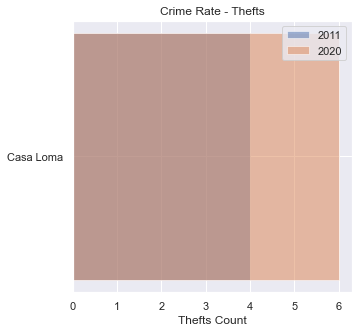

In [69]:
# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(5, 5))
plt.barh(casa_2011['Neighbourhood'], casa_2011['Thefts'], label='2011', alpha=0.5)
plt.barh(casa_2020['Neighbourhood'], casa_2020['Thefts'], label='2020', alpha=0.5)
plt.title('Crime Rate - Thefts')
plt.xlabel('Thefts Count')
plt.legend()
plt.show()

##### COMMENT (ABOVE): Approximately 30% increase in the Casa Loma Neighbourhood. May be correlated to more population count.

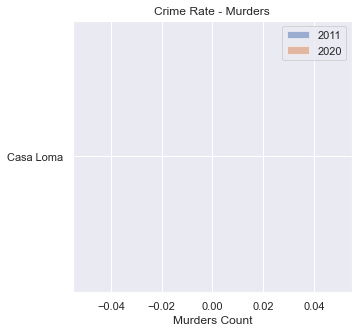

In [70]:
# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(5, 5))
plt.barh(casa_2011['Neighbourhood'], casa_2011['Murders'], label='2011', alpha=0.5)
plt.barh(casa_2020['Neighbourhood'], casa_2020['Murders'], label='2020', alpha=0.5)
plt.title('Crime Rate - Murders')
plt.xlabel('Murders Count')
plt.legend()
plt.show()

##### COMMENT (ABOVE): No change in the Casa Loma Neighbourhood within a span of 9-10 years.

In [71]:
# Population
sub_popu_df_2.loc[sub_popu_df_2['Neighbourhood'] == 'Casa Loma']

,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Pop2016,Pop2011,PopChg11t16
95,96,Casa Loma,Central Toronto,M4V,43.686412,-79.400049,"10,968","10,487",4.60%


##### COMMENT (ABOVE): An increase in population between 2011 through 2016 indicates that there is some correlation with more population count to the above figures.

In [72]:
# Example - casa_2011 = sub_safe_df_2_typ_2.loc[sub_safe_df_2_typ_2['Neighbourhood'] == 'Casa Loma']
home_price_2011 = tor_sub_merge_2011_test.loc[tor_sub_merge_2011_test['Neighbourhood'] == 'Casa Loma']

# Verify Casa Loma selection
home_price_2011

,Neighbourhood,Language - Chinese,Language - Korean,Language - Tagalog,Language - Tamil,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,...,Tree Cover,DineSafe Inspections,Female Fertility,Health Providers,Student Nutrition,Fire Medical Calls,Fire Vehicle Incidents,Fires & Fire Alarms,Hazardous Incidents,Total Major Crime Incidents
30,Casa Loma,255,35,145,5,258,142,771,1083381,3283,...,893260.9166,5,29.787234,77,0,444,55,236,81,91


In [73]:
# Find Min/Mean/Max home prices in 2011
home_price_max = tor_sub_merge_2011_test[tor_sub_merge_2011_test['Home Prices'] == 
                                         tor_sub_merge_2011_test['Home Prices'].max()]
home_price_mean = tor_sub_merge_2011_test['Home Prices'].mean()
home_price_min = tor_sub_merge_2011_test[tor_sub_merge_2011_test['Home Prices'] == 
                                         tor_sub_merge_2011_test['Home Prices'].min()]

print(home_price_max[['Neighbourhood', 'Home Prices']])
print()
print('2011 Average Home Prices: {}'.format(home_price_mean))
print()
print(home_price_min[['Neighbourhood', 'Home Prices']])

        Neighbourhood  Home Prices
35  Forest Hill South      1585984

2011 Average Home Prices: 702095.1

   Neighbourhood  Home Prices
19       Niagara       398281


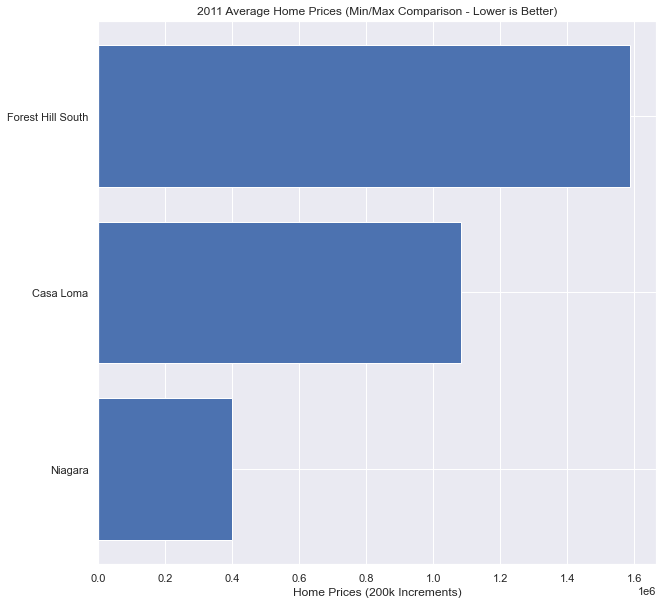

In [74]:
# Home Price Comparison
home_price_comparison = tor_sub_merge_2011_test.iloc[[19, 30, 35]]

# Utilize seaborn plot theme
sns.set()

plt.figure(figsize=(10, 10))
plt.barh(home_price_comparison['Neighbourhood'], home_price_comparison['Home Prices'])
plt.title('2011 Average Home Prices (Min/Max Comparison - Lower is Better)')
plt.xlabel('Home Prices (200k Increments)')
plt.show()

##### COMMENT (ABOVE): As of 2021, Canada's inflation rate is approximately 3.4%. Home prices should be much higher since 2011. Prices are based on the Canadian dollar - not American dollar.

#### Analysis-4 -- Foursquare API Process

#### Foursquare Processing - API parameters

In [75]:
# Foursquare API
# NOTE: Clear output after running
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 50 # 100 - Default Foursquare API limit value

#### Foursquare Processing - Choose Downtown Toronto neighbourhood -- Reset index

In [76]:
# Test only - Remove
toronto_neighborhood = toronto_cluster_filtered
toronto_neighborhood.head()

,Cluster Labels,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Total Major Crime Incidents,Fires & Fire Alarms,Hazardous Incidents,Pollutant Carcinogenic TEP Score,Pollutants Released to Air,Health Providers
0,1,66,Danforth,East Toronto,M4C,43.695344,-79.318389,262,119,72,0.00,0,53
1,2,80,Palmerston-Little Italy,Downtown Toronto,M6G,43.669542,-79.422564,261,149,99,0.00,0,57
2,0,96,Casa Loma,Central Toronto,M4V,43.686412,-79.400049,91,236,81,75.84,575,77
3,0,97,Yonge-St.Clair,Central Toronto,M4V,43.686412,-79.400049,111,175,67,0.00,0,56
4,0,100,Yonge-Eglinton,Central Toronto,M4P,43.712751,-79.390197,229,147,115,0.00,0,62


In [77]:
# Chosen Neighborhood in Central Toronto Borough
toronto_neighborhood = toronto_cluster_filtered

# Reset DataFrame index
toronto_neighborhood.reset_index(drop=True, inplace=True) # Reset index from previous query
#toronto_neighborhood.pop('index')

In [78]:
toronto_neighborhood

,Cluster Labels,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Total Major Crime Incidents,Fires & Fire Alarms,Hazardous Incidents,Pollutant Carcinogenic TEP Score,Pollutants Released to Air,Health Providers
0,1,66,Danforth,East Toronto,M4C,43.695344,-79.318389,262,119,72,0.00,0,53
1,2,80,Palmerston-Little Italy,Downtown Toronto,M6G,43.669542,-79.422564,261,149,99,0.00,0,57
2,0,96,Casa Loma,Central Toronto,M4V,43.686412,-79.400049,91,236,81,75.84,575,77
3,0,97,Yonge-St.Clair,Central Toronto,M4V,43.686412,-79.400049,111,175,67,0.00,0,56
4,0,100,Yonge-Eglinton,Central Toronto,M4P,43.712751,-79.390197,229,147,115,0.00,0,62


#### Foursquare Processing - Choose Downtown Toronto neighbourhood -- Casa Loma

In [79]:
# Check out neighbourhood - Casa Loma
toronto_neighborhood.loc[toronto_neighborhood['Neighbourhood'] == 'Casa Loma']

,Cluster Labels,Neighbourhood Id,Neighbourhood,Borough,Postal Code,Latitude,Longitude,Total Major Crime Incidents,Fires & Fire Alarms,Hazardous Incidents,Pollutant Carcinogenic TEP Score,Pollutants Released to Air,Health Providers
2,0,96,Casa Loma,Central Toronto,M4V,43.686412,-79.400049,91,236,81,75.84,575,77


In [80]:
toronto_neighborhood.iloc[2]

Cluster Labels                                    0
Neighbourhood Id                                 96
Neighbourhood                             Casa Loma
Borough                             Central Toronto
Postal Code                                     M4V
Latitude                                  43.686412
Longitude                                -79.400049
Total Major Crime Incidents                      91
Fires & Fire Alarms                             236
Hazardous Incidents                              81
Pollutant Carcinogenic TEP Score              75.84
Pollutants Released to Air                      575
Health Providers                                 77
Name: 2, dtype: object

#### Foursquare Processing - Choose Central Toronto neighbourhood -- Set neighbourhood coordinates

In [81]:
# Specify coordinates
neighborhood_latitude = toronto_neighborhood.loc[2, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_neighborhood.loc[2, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_neighborhood.loc[2, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Casa Loma are 43.6864123, -79.4000493.


#### Foursquare Processing - Search query for Thai categories

In [82]:
search_query = 'Thai'
radius = 100
print(search_query + ' .... OK!')

Thai .... OK!


#### Foursquare Processing - Search query for Thai categories -- search venue format

In [ ]:
# NOTE: Clear output after running
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # Display URL

##### NOTE: Utilizing search query to find available venues.

In [84]:
# Query Foursquare
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60b31bd1f3fd206e117773d8'},
 'response': {'venues': [{'id': '5a67afb973fe2528841f60f3',
    'name': 'The Market By Longo’s',
    'location': {'address': '111 St Clair Ave W',
     'lat': 43.686711,
     'lng': -79.399536,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.686711,
       'lng': -79.399536}],
     'distance': 53,
     'postalCode': 'M4V 1N5',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['111 St Clair Ave W',
      'Toronto ON M4V 1N5',
      'Canada']},
    'categories': [{'id': '52f2ab2ebcbc57f1066b8b46',
      'name': 'Supermarket',
      'pluralName': 'Supermarkets',
      'shortName': 'Supermarket',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1622350801',
    'hasPerk': False},
   {'id': '55c78cef498ec4095e9fba41',
    'name': 'LCBO',
    '

#### Foursquare Processing - Create DataFrame from "results" (JSON data) ouput

In [85]:
# Code within this is cell is from lesson - Mofied as needed
# Assign relevant part of JSON to venues
venues = results['response']['venues']

# Transform venues into a dataframe
# dataframe = json_normalize(venues)
dataframe = pd.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,venuePage.id
0,5a67afb973fe2528841f60f3,The Market By Longo’s,"[{'id': '52f2ab2ebcbc57f1066b8b46', 'name': 'S...",v-1622350801,False,111 St Clair Ave W,43.686711,-79.399536,"[{'label': 'display', 'lat': 43.686711, 'lng':...",53,M4V 1N5,CA,Toronto,ON,Canada,"[111 St Clair Ave W, Toronto ON M4V 1N5, Canada]",NaN,NaN
1,55c78cef498ec4095e9fba41,LCBO,"[{'id': '4bf58dd8d48988d186941735', 'name': 'L...",v-1622350801,False,111 St. Clair West,43.686991,-79.399238,"[{'label': 'display', 'lat': 43.68699063107488...",91,NaN,CA,Toronto,ON,Canada,"[111 St. Clair West, Toronto ON, Canada]",NaN,NaN
2,4de67648fa764cf4bee0063a,Imperial Plaza Rooftop,"[{'id': '4bf58dd8d48988d133951735', 'name': 'R...",v-1622350801,False,111 st clair ave west,43.686747,-79.399083,"[{'label': 'display', 'lat': 43.686747, 'lng':...",86,NaN,CA,Toronto,ON,Canada,"[111 st clair ave west, Toronto ON, Canada]",NaN,NaN
3,53fd3897498ea15f71e72ea9,Starbucks,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1622350801,False,95 St Clair Ave W,43.686756,-79.398292,"[{'label': 'display', 'lat': 43.686756, 'lng':...",146,M4V 1N7,CA,Toronto,ON,Canada,"[95 St Clair Ave W (Deer Park Crescent), Toron...",Deer Park Crescent,NaN
4,4c9687b538dd8cfa2e53dc62,TTC Stop #8160,"[{'id': '4bf58dd8d48988d1fc931735', 'name': 'L...",v-1622350801,False,St Clair Ave W,43.687089,-79.398159,"[{'label': 'display', 'lat': 43.687089, 'lng':...",169,M4V 1N6,CA,Toronto,ON,Canada,"[St Clair Ave W (Deer Park Crescent), Toronto ...",Deer Park Crescent,NaN


#### Foursquare Processing - Subset / Clean DataFrame

In [86]:
# Code within this is cell is from lesson - Mofied as needed
# Keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# Clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,The Market By Longo’s,Supermarket,111 St Clair Ave W,43.686711,-79.399536,"[{'label': 'display', 'lat': 43.686711, 'lng':...",53,M4V 1N5,CA,Toronto,ON,Canada,"[111 St Clair Ave W, Toronto ON M4V 1N5, Canada]",NaN,5a67afb973fe2528841f60f3
1,LCBO,Liquor Store,111 St. Clair West,43.686991,-79.399238,"[{'label': 'display', 'lat': 43.68699063107488...",91,NaN,CA,Toronto,ON,Canada,"[111 St. Clair West, Toronto ON, Canada]",NaN,55c78cef498ec4095e9fba41
2,Imperial Plaza Rooftop,Roof Deck,111 st clair ave west,43.686747,-79.399083,"[{'label': 'display', 'lat': 43.686747, 'lng':...",86,NaN,CA,Toronto,ON,Canada,"[111 st clair ave west, Toronto ON, Canada]",NaN,4de67648fa764cf4bee0063a
3,Starbucks,Coffee Shop,95 St Clair Ave W,43.686756,-79.398292,"[{'label': 'display', 'lat': 43.686756, 'lng':...",146,M4V 1N7,CA,Toronto,ON,Canada,"[95 St Clair Ave W (Deer Park Crescent), Toron...",Deer Park Crescent,53fd3897498ea15f71e72ea9
4,TTC Stop #8160,Light Rail Station,St Clair Ave W,43.687089,-79.398159,"[{'label': 'display', 'lat': 43.687089, 'lng':...",169,M4V 1N6,CA,Toronto,ON,Canada,"[St Clair Ave W (Deer Park Crescent), Toronto ...",Deer Park Crescent,4c9687b538dd8cfa2e53dc62


#### Foursquare Processing - Check filtered venue categories

In [87]:
# Check values in the "categories" column
dataframe_filtered['categories'].value_counts()

Office                                      5
Building                                    3
Light Rail Station                          3
Residential Building (Apartment / Condo)    3
Embassy / Consulate                         2
Government Building                         2
Pharmacy                                    2
Cemetery                                    1
Doctor's Office                             1
Park                                        1
Fabric Shop                                 1
Coffee Shop                                 1
Dog Run                                     1
Advertising Agency                          1
Dentist's Office                            1
Café                                        1
Afghan Restaurant                           1
Spiritual Center                            1
Spa                                         1
Elementary School                           1
Salon / Barbershop                          1
Liquor Store                      

#### Foursquare Processing - Assign food restaurant categories

#### NOTE: Only categories with "restaurant" or possible food competition were chosen.

In [88]:
# Example - restaurant = dataframe_filtered[dataframe_filtered['categories'] == 'Restaurant']
restaurant_1 = dataframe_filtered[dataframe_filtered['categories'] == 'Coffee Shop']
restaurant_2 = dataframe_filtered[dataframe_filtered['categories'] == 'Café']
restaurant_3 = dataframe_filtered[dataframe_filtered['categories'] == 'Afghan Restaurant']
restaurant_4 = dataframe_filtered[dataframe_filtered['categories'] == 'Diner']
restaurant_5 = dataframe_filtered[dataframe_filtered['categories'] == 'Italian Restaurant']

#### Foursquare Processing - Visualize food restaurant locations

In [89]:
# Code within this is cell is from lesson - Mofied as needed
venues_map = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# Add a red circle marker to represent the Waterfront Communities-The Island Neighborhood
folium.CircleMarker(
    [neighborhood_latitude, neighborhood_longitude],
    radius=10,
    color='red',
    popup='Casa Loma Neighborhood',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# Add restaurant 1 as a blue circle marker
for lat, lng, label in zip(restaurant_1.lat, restaurant_1.lng, restaurant_1.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# Add restaurant 2 as a blue circle marker
for lat, lng, label in zip(restaurant_2.lat, restaurant_2.lng, restaurant_2.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)    

# Add restaurant 3 as a blue circle marker
for lat, lng, label in zip(restaurant_3.lat, restaurant_3.lng, restaurant_3.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# Add restaurant 4 as a blue circle marker
for lat, lng, label in zip(restaurant_4.lat, restaurant_4.lng, restaurant_4.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# Add restaurant 5 as a blue circle marker
for lat, lng, label in zip(restaurant_5.lat, restaurant_5.lng, restaurant_5.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)    
    
# Display map
venues_map

##### NOTE: The Folium Map may not render on GitHub. I have added images in the repository. 
##### https://github.com/zer0-zer0-edward/Coursera_Capstone
##### Image is https://github.com/zer0-zer0-edward/Coursera_Capstone/blob/main/202104530_Capstone_Project_Week-5_Folium_3.png

#### COMMENT (ABOVE): The top 50 search query on the Foursquare API did not produce any Thai-based restaurant in a 100-mile radius. The food-based venues selected are located within walking/driving distance, which may indicate for a good place to setup a restaurant. 

## Results and Discussion <a name="Results"></a>

#### The analysis provided favorable output for the stakeholder/s, where there is one neighbourhood that meets their primary criteria of safety and health factors. The Foursquare API results also provided a favorable outcome as the search query has shown no competition in the same ethnic restaurant theme/choice - Thai cuisine. Not only was the Toronto datasets and Foursquare outcome presented the best neighbourhood in Toronto, those results has also provided the stakeholder/s with viable information that make up that neighbourhood. For example, there is a low density of restaurants found within a 100-mile radius. Meaning a higher chance of successfully launching the Thai restaurant. The neighbourhood of Casa Loma also have less crime-rated offenses compared to other neighbourhoods. And less pollution produced which have a higher chance of remaining healthier compare to other neighbourhoods.

#### One caveat with the analysis is the use of available datasets. The datasets utilized are nearly from a decade ago, 2011. Approximately 10 years have passed and Toronto may have changed drastically over the years (e.g. more population, more neighbourhood division - 158 from 140, et al).Not to mention, that the dataset can be incomplete with missing data, which can potentially limit the choices in the data exploration and analysis process. Another caveat for the stakeholder/s is the home price cost in Casa Loma. The cost is above average and that type of price can be one of the main factors that can shape this type of assessment for any stakeholder considering that the inflation rate has increased in the last 10 years - 3.4%.

## Conclusion <a name="Conclusion"></a>

#### The purpose of the assessment is to identify potential neigbourhoods to start a Thai restaurant business at mainly based on health and safety factors. The assessment was able to determine a set of favorable neighbourhoods with tolerable health and safety factors and one neighbourhood stood out. The neighbourhood of Casa Loma is recommended as this neighbourhood provides the stakeholder/s with a complete picture of how the neighbourhood is like, which provides them an ideal neighbourhood to start a business in and to live nearby. Other factors such as home price, school attractiveness, local attractions, and etc. may also be factors, but will ultimately be decided by stakeholder/s.

#### NOTE: The assessment and analysis done above will not rely on all information provided. Selection of each dataset and subsequent subsets will rely on the needs of each stakeholder.